In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('../../../data/train/train.csv')

In [12]:
print(df)

   ID  Age  CreditScore Education RiskLevel
0   1   35          720        16       Low
1   2   28          650        14      High
2   3   45          750   missing       Low
3   4   31          600        12      High
4   5   52          780        18       Low
5   6   29          630        14      High
6   7   42          710        16       Low
7   8   33          640        12      High


In [13]:
# Convert "missing" to NaN and ensure the column is numeric
df["Education"] = df["Education"].replace("missing", np.nan)
df["Education"] = pd.to_numeric(df["Education"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8 non-null      int64  
 1   Age          8 non-null      int64  
 2   CreditScore  8 non-null      int64  
 3   Education    7 non-null      float64
 4   RiskLevel    8 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 452.0+ bytes


In [15]:
# Handle missing values by imputing the mean of Education
df = df.copy()
df["Education"] = df["Education"].fillna(df["Education"].mean())

X = df[["Age", "Education"]].values
y = df["CreditScore"].values.reshape(-1, 1)

# Add bias to X
X_b = np.c_[np.ones((X.shape[0], 1)), X] 

# Compute theta using the normal equation:
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

intercept, coef_age, coef_edu = theta.flatten()

print(f"Intercept (θ0): {intercept:.2f}")
print(f"Coefficient for Age (θ1): {coef_age:.2f}")
print(f"Coefficient for Education (θ2): {coef_edu:.2f}")

print("\nInterpretation:")
print(f"- The intercept (θ0 = {intercept:.2f}) is the expected CreditScore when Age and Education are both zero.")
print(f"- The coefficient for Age (θ1 = {coef_age:.2f}) means that, holding Education constant, each additional year of age increases the CreditScore by {coef_age:.2f} points.")
print(f"- The coefficient for Education (θ2 = {coef_edu:.2f}) means that, holding Age constant, each additional year of education increases the CreditScore by {coef_edu:.2f} points.")


Intercept (θ0): 327.32
Coefficient for Age (θ1): 4.25
Coefficient for Education (θ2): 13.79

Interpretation:
- The intercept (θ0 = 327.32) is the expected CreditScore when Age and Education are both zero.
- The coefficient for Age (θ1 = 4.25) means that, holding Education constant, each additional year of age increases the CreditScore by 4.25 points.
- The coefficient for Education (θ2 = 13.79) means that, holding Age constant, each additional year of education increases the CreditScore by 13.79 points.


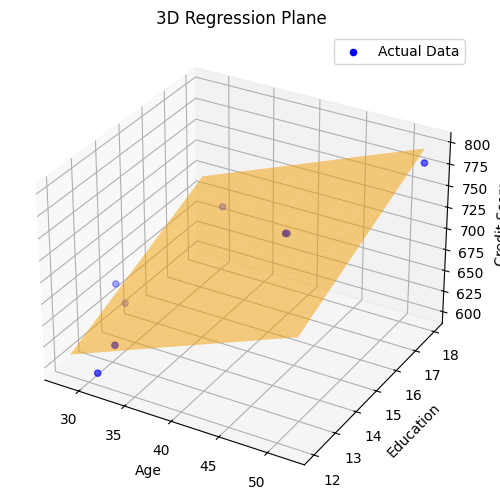

In [16]:
# Train Linear Regression Model
X = df[["Age", "Education"]]
y = df["CreditScore"]
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coef_age, coef_edu = model.coef_

# Generate regression surface
age_vals = np.linspace(df["Age"].min(), df["Age"].max(), 10)
edu_vals = np.linspace(df["Education"].min(), df["Education"].max(), 10)
Age_grid, Edu_grid = np.meshgrid(age_vals, edu_vals)
Credit_grid = intercept + coef_age * Age_grid + coef_edu * Edu_grid  # Prediction plane

# 3D Scatter & Regression Plane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Education"], df["CreditScore"], color='blue', label="Actual Data")
ax.plot_surface(Age_grid, Edu_grid, Credit_grid, alpha=0.5, color='orange')
ax.set_xlabel("Age")
ax.set_ylabel("Education")
ax.set_zlabel("Credit Score")
ax.set_title("3D Regression Plane")
ax.legend()
plt.show()

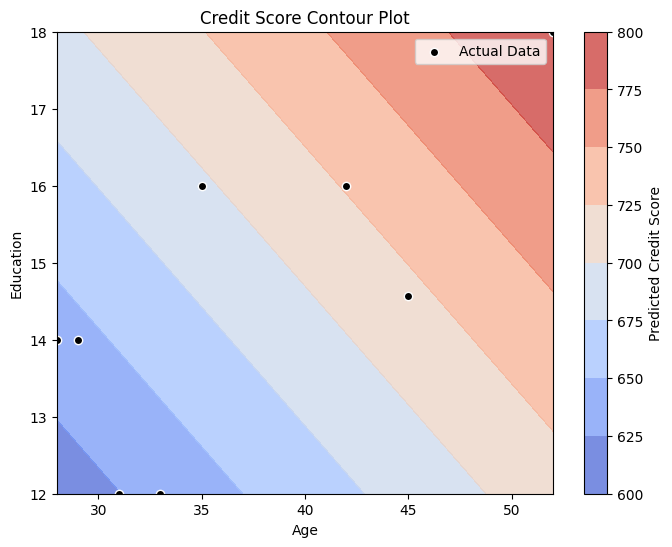

In [17]:
# Contour Plot
fig = plt.figure(figsize=(8, 6))
contour = plt.contourf(Age_grid, Edu_grid, Credit_grid, cmap="coolwarm", alpha=0.75)
cbar = plt.colorbar()
cbar.set_label("Predicted Credit Score")
plt.scatter(df["Age"], df["Education"], color='black', edgecolor="white", label="Actual Data")
plt.xlabel("Age")
plt.ylabel("Education")
plt.title("Credit Score Contour Plot")
plt.legend()
plt.show()


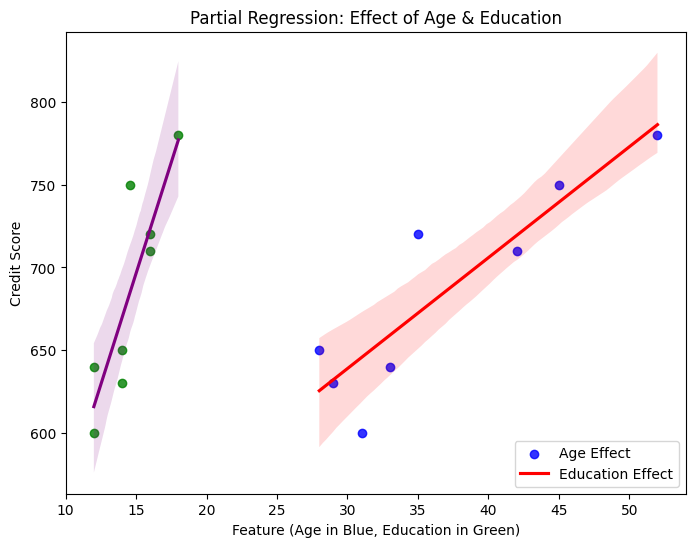

In [18]:
# Partial Regression Plots
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=df["Age"], y=df["CreditScore"], scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ax=ax)
sns.regplot(x=df["Education"], y=df["CreditScore"], scatter_kws={'color':'green'}, line_kws={'color':'purple'}, ax=ax)
ax.set_xlabel("Feature (Age in Blue, Education in Green)")
ax.set_ylabel("Credit Score")
ax.set_title("Partial Regression: Effect of Age & Education")
ax.legend(["Age Effect", "Education Effect"])

plt.show()